# Activation Functions for Non-linear Fintech models



1. Overview:<br> Neural networks are frequently employed in the financial technology (FinTech) industry to analyse extremely complex and dynamic datasets, including credit scores, transaction histories, market prices, and fraud indications.<br>
The activation function, which introduces non-linearity into the network, is a crucial component of neural networks that allows them to recognise complex patterns. A neural network's capacity to simulate real-world financial behaviours involving abrupt changes, compounding effects, and non-linear relationships would be restricted in the absence of activation functions, which would give the network the characteristics of a completely linear model.
<br>FinTech models can increase forecast accuracy, uncover hidden trends, and adjust to quickly shifting market conditions by implementing the right activation functions.


2. Methodology:<br>
While building a neural network, one key decision is selecting the Activation Function for both the hidden layer and the output layer. It is a mathematical function applied to the output of a neuron. It introduces non-linearity into the model, allowing the network to learn and represent complex patterns in the data. Without this non-linearity feature a neural network would behave like a linear regression model no matter how many layers it has.
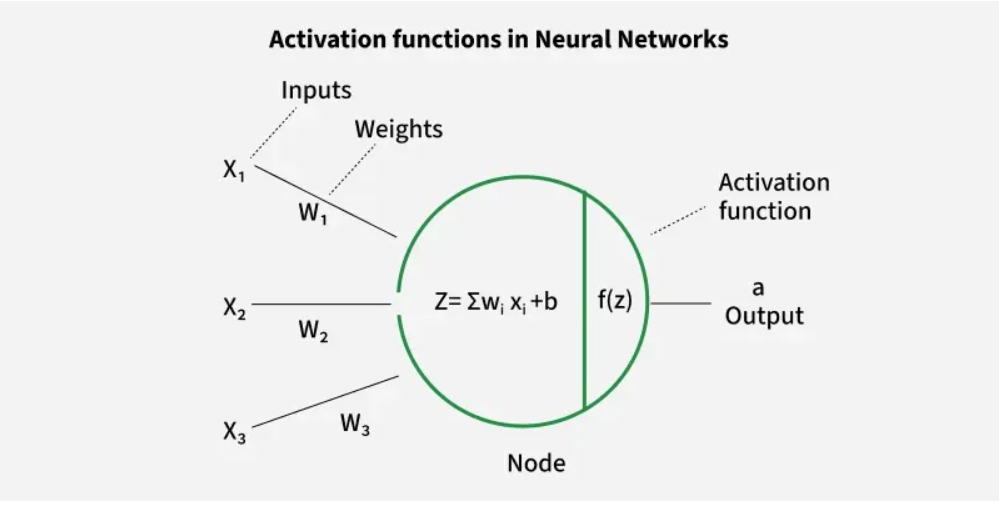
<br>i) Sigmoid function :  is characterized by 'S' shape. It is mathematically defined as:
$$A=1/(1+e^{-x})$$
  This formula ensures a smooth and continuous output that is essential for gradient-based optimization methods.

  It allows neural networks to handle and model complex patterns that linear equations cannot.<br>
  The output ranges between 0 and 1, hence useful for binary classification.
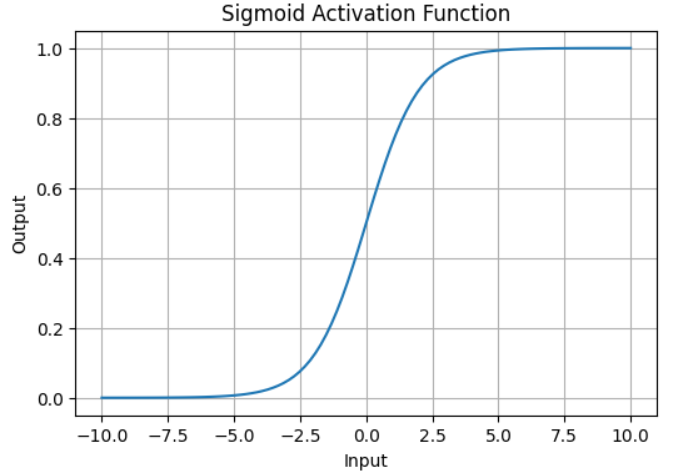
<br> ii)ReLU function (Rectified Linear Unit function):
        ReLU activation is defined by
        A(x) = max(0,x)

         Value Range : [0,$∞$).

    Nature :  It is a non-linear activation function, allowing neural networks to learn complex patterns and making backpropagation more efficient.
    ReLU is less computationally intensive than sigmoid because it involves simpler mathematical operations.<br>
    At a time only a few neurons are activated making the network sparse making it efficient and easy for computation.
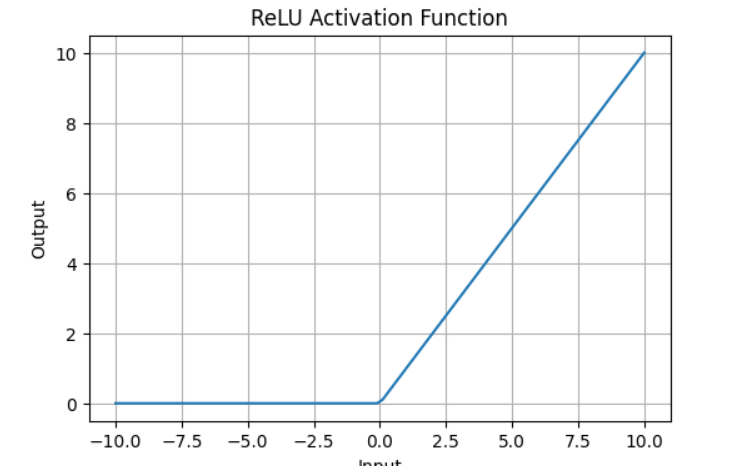

3. Applictions of Neural Networks in Fintech domain :<br>
i) Algortihmic trading : To predict long and short term movement of asset prices.<br>
ii) Fraud Detection : To identify suspicious transaction patterns or payment behaviors.<br>
iii) Customer segmentation and personalisation plan<br>
iv) Sentiment analysis in Financial markets<br>
v) Predicting and analysing customer churn : Process of identifying which customers are likely to cancel their subscription or stop using the service.
In this assignment, we have created a simple neural network with one hidden layer to predict customer churn.

4. Implementation :<br>
In this assingment we have made a neural network in Python, using libraries such as numpy, pandas, OneHotEncoder, StandardScaler and time to predict customer churn of an online subscription service.

We will go through the different code blocks in this colab notebook wih their explanations.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import time
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive #This block is not needed if reading directy from the device and not from a drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This code block mounts our Google Drive to the Colab environment.

In [ ]:
#https://drive.google.com/drive/folders/1J6YyKEZOb33_S4mhHKha_fBg1DQb9a11?usp=sharing Google drive folder link with both csv files

df=pd.read_csv('/content/drive/MyDrive/Churn Data/customer_churn_dataset-training-master.csv')#Change to path of training data set (default is google drive path)
N=1500
df = df.sample(n=1500, random_state=42)
df = df.reset_index(drop=True)

df_test=pd.read_csv('/content/drive/MyDrive/Churn Data/customer_churn_dataset-testing-master.csv') # Change to path of testing data set (default is google drive path)
N_test=100
df_test= df_test.sample(n=N, random_state=42)
df_test = df_test.reset_index(drop=True)

This code block reads two CSV files from our Google Drive into pandas DataFrames.<br>
The first line reads the csv file customer_churn_dataset-training-master.csv into a pandas DataFrame named df and assigns 100 rows of the database to df for training.

The 4th line of code reads the csv file customer_churn_dataset-testing-master.csv into a pandas DataFrame named df_test and assigns 10 rows of the database to df_test for testing.

In [ ]:
def find_f_x (x, W1, W2, b1, b2, activ_func): #all np arrays
# x is the set of m points, each being n dimensional
# W1 is a set of p weights, each being n dimensional
# b1 is a set of p biases, each being real
# Hence, the activation layer elements phi_j(x_i) is made by:
# phi_j(x_i) =phi_ij = activ_func (W1_j.(x_i)+b1_j)

  activ_func_vec=np.vectorize(activ_func)
  unit_m=np.ones(len(x))
  feature_matrix = activ_func_vec( x @ W1.T + np.outer(unit_m, b1.T)) #m*p

# W2 is a set of p weights, one corresponding to each function in the activation matrix
#b2 is a single real bias

  y_predicted = feature_matrix @ W2 + b2

  return feature_matrix, y_predicted

In [ ]:
def obtain_loss(y,y_pred):
  #This function obtains Loss = 1/m sum(y-y_pred)^2
  if(len(y)!=len(y_pred)):
     raise ValueError("Prediction is mismatched with output", len(y),len(y_pred))
  Loss=0
  for i in range(len(y)):
    Loss=Loss+ (y[i]-y_pred[i])**2
  Loss=Loss/len(y)
  return Loss



def obtain_gradients(x,y,y_pred,feature_matrix,activ_func_deriv,W1,b1,W2,b2):
  #y_pred = activ_func([x @ W1.T + 1_m*b1.T]) @ W2 +1_m*b2

  m=len(y)
  r=y_pred-y
  #dL/dy_pred = 2/m (y_pred -y) = 2r/m.
  # We multiply this with d_ypred/dW / dy_pred/db to find gradient for the paramters

  dL_dW2 = (2/m)*feature_matrix.T @ r
  dL_db2 = (2/m)*np.sum(r)

  #The gradient formula for (dL/dW1)_jn = 2/m sum_over_i (ri*activ_func_der(xi.W1j + bj)*xin)*W2j

  dL_dW1 =np.zeros_like(W1)
  for j in range (len(dL_dW1)):
    for n in range (len(dL_dW1[0])):
      sum=0

      for i in range(len(r)):

        sum = sum + r[i]*x[i][n]*activ_func_deriv (np.dot(x[i],W1[j])+b1[j])
      sum=sum*2*W2[j]/m

      dL_dW1[j][n]=sum

  #The gradient formula for (dL/db1)_j = 2/m sum_over_i (ri*activ_func_der(xi.W1j + bj))*W2j
  dL_db1 = np.zeros_like(b1)
  for j in range(len(dL_db1)):
    sum =0
    for i in range (len(r)):
      sum=sum+ r[i]*activ_func_deriv (np.dot(x[i],W1[j])+b1[j])
    sum=sum*2*W2[j]/m
    dL_db1[j]=sum

  return dL_dW1, dL_db1, dL_dW2, dL_db2


In [ ]:

#One set of activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

In [ ]:
#Second set of activation functions
def RelU(x):
  if(x>0):
    return x
  else:
    return 0

def RelU_derivative(x):
  if(x>0):
    return 1
  else:
    return 0


In [ ]:
#This bloc reads the training df and initialises all the vectors

# Serial number is not an input or output data

df = df.drop(columns=["CustomerID"])

x_bare = df.drop(columns=["Churn"])

categorical_cols = ["Gender", "Subscription Type", "Contract Length"]  # These columns are classficiational

# Drop rows with NaNs in numeric columns only
X_numeric = x_bare.drop(columns=categorical_cols)
rows_without_nan = X_numeric.dropna().index

# Keep only these rows in the original dataframe
df_clean = df.loc[rows_without_nan].reset_index(drop=True)

y = df_clean["Churn"].values
x_bare_clean = df_clean.drop(columns=["Churn"])

encoder = OneHotEncoder(sparse_output=False, drop="first")  # drop="first" to avoid dummy variable trap

# OneHotEncoder will make seperate columns for each type in each column
# Eg:Subscription Type has a column for Basic and Standard which will have 1 or 0 for each customer
# depending on "Subscription type " column entry. Premium doesnt have a column since it is 1-(Basic+Standard)
# Thats why we drop "first"

X_encoded = encoder.fit_transform(x_bare_clean[categorical_cols])

# Replace categorical columns in X with encoded ones
X_numeric_clean = x_bare_clean.drop(columns=categorical_cols).values

X_all = np.hstack([X_numeric_clean, X_encoded])

# Scale all features
scaler = StandardScaler()
x = scaler.fit_transform(X_all)

m, n = x.shape
p = 5  # change based on how many neurons we want




In [ ]:
#This block reads and formats test data


df_test = df_test.drop(columns=["CustomerID"])

x_bare_test = df_test.drop(columns=["Churn"])

# Drop rows with NaNs in numeric columns only
X_numeric_test = x_bare_test.drop(columns=categorical_cols)
rows_without_nan_test = X_numeric_test.dropna().index

# Keep only these rows in the original dataframe
df_clean_test = df_test.loc[rows_without_nan_test].reset_index(drop=True)

y_test = df_clean_test["Churn"].values
x_bare_clean_test = df_clean_test.drop(columns=["Churn"])

encoder = OneHotEncoder(sparse_output=False, drop="first")  # drop="first" to avoid dummy variable trap

# OneHotEncoder will make seperate columns for each type in each column
# Eg:Subscription Type has a column for Basic and Standard which will have 1 or 0 for each customer
# depending on "Subscription type " column entry. Premium doesnt have a column since it is 1-(Basic+Standard)
# Thats why we drop "first"

X_encoded_test = encoder.fit_transform(x_bare_clean_test[categorical_cols])

# Replace categorical columns in X with encoded ones
X_numeric_clean_test = x_bare_clean_test.drop(columns=categorical_cols).values

X_all_test = np.hstack([X_numeric_clean_test, X_encoded_test])

# Scale all features
scaler = StandardScaler()
x_test = scaler.fit_transform(X_all_test)

This code block preprocesses the testing data exactly as done by the code block above on the training data.

Average No. of iterations 234.4
Average Loss 0.11190482142670946
Testing Loss  0.2385378519981981
Average Elapsed Time 60.06727838516235
Average Accuracy Train 0.8638666666666666
Average Accuracy Test 0.6444000000000001


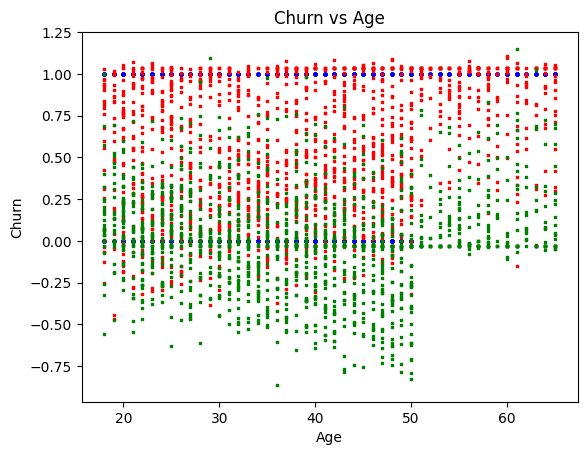

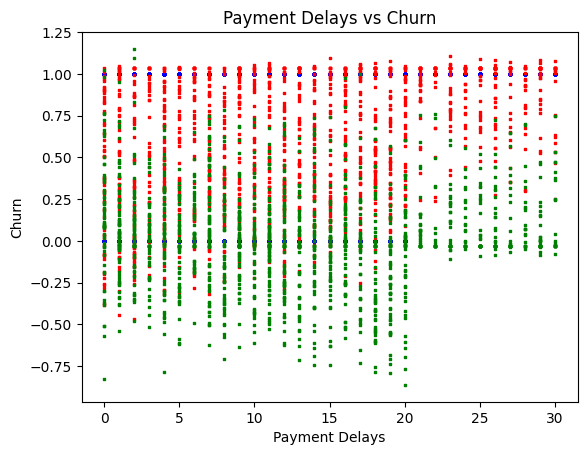

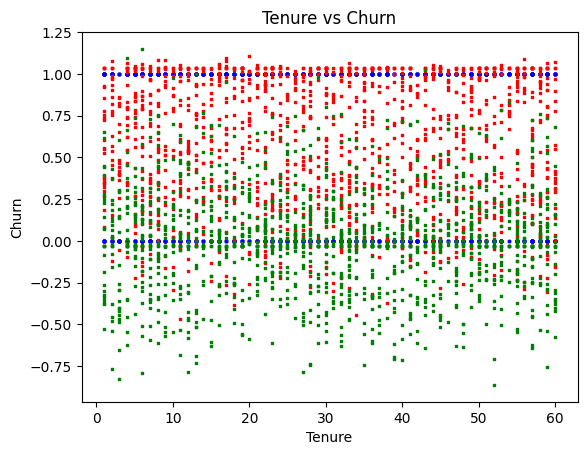

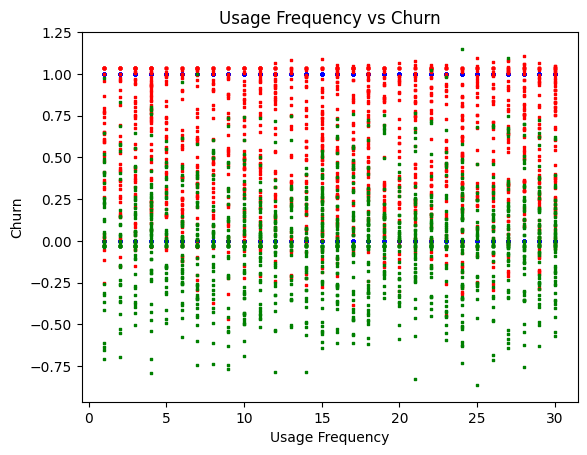

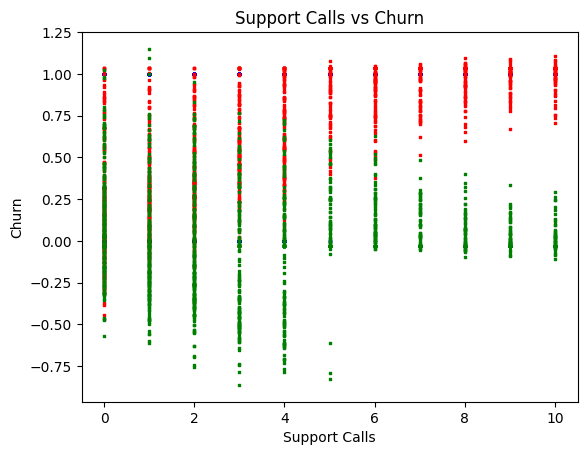

In [ ]:
#This is the main code function block. We consider the efficiency of the model based on the time here


#Choosing activation function: sigmoid or RelU
activ_func=RelU
activ_func_deriv=RelU_derivative

#Obtaining the first set of graidents



step_size = 0.05
avg_iterations=0
avg_accuracy_train=0
avg_accuracy_test=0
avg_Loss=0
avg_elapsed_time=0


for i in range(10):
 start_time = time.time()
 W1 = np.random.normal(loc=0, scale=1 / np.sqrt(n), size=(p, n))
 b1 = np.random.normal(loc=0, scale=1 / np.sqrt(n), size=p)
 W2 = np.random.normal(loc=0, scale=1 / np.sqrt(p), size=p)
 b2 = np.random.normal(loc=0, scale=1 / np.sqrt(p))
 feature_matrix, y_pred =  find_f_x (x, W1, W2, b1, b2, activ_func)
 dL_dW1, dL_db1, dL_dW2, dL_db2 = obtain_gradients(x,y,y_pred,feature_matrix,activ_func_deriv,W1,b1,W2,b2)
 Loss= obtain_loss(y,y_pred)

 Loss_old=0
 iteration=0
 while(np.abs(Loss-Loss_old)>1e-4):
  Loss_old=Loss #We stop iterating when the Loss stops updating
  #Updating based on gradient descent
  W1 = W1 - step_size*dL_dW1
  W2 = W2 - step_size*dL_dW2
  b1 = b1 - step_size*dL_db1
  b2 = b2 - step_size*dL_db2

  #recalculating all the parameters
  feature_matrix, y_pred =  find_f_x (x, W1, W2, b1, b2, activ_func)
  dL_dW1, dL_db1, dL_dW2, dL_db2 = obtain_gradients(x,y,y_pred,feature_matrix,activ_func_deriv,W1,b1,W2,b2)
  Loss = obtain_loss(y,y_pred)

  iteration=iteration+1

  if(iteration>500):
    raise ValueError("Iterations have exceeded 500")
    break
 end_time = time.time()
 elapsed_time = end_time - start_time

#For test data
 y_pred_train = find_f_x(x, W1,W2,b1,b2,activ_func)[1]
 y_pred_test = find_f_x(x_test, W1,W2,b1,b2,activ_func)[1]
 accuracy_train = np.mean(np.abs(y_pred_train-y)<0.5)
 accuracy_test = np.mean(np.abs(y_pred_test-y_test)<0.5)
 Loss_test=obtain_loss(y_test, y_pred_test)
 avg_iterations+=iteration
 avg_accuracy_train+=accuracy_train
 avg_accuracy_test+=accuracy_test
 avg_Loss+=Loss
 avg_elapsed_time+=elapsed_time

x_age = x_bare_clean["Age"].values
x_gender=x_bare_clean["Gender"].values
x_tenure=x_bare_clean["Tenure"].values
x_usage_frequency=x_bare_clean["Usage Frequency"].values
x_support_calls = x_bare_clean["Support Calls"].values
x_payment_delays= x_bare_clean["Payment Delay"].values
x_subscription_type= x_bare_clean["Subscription Type"].values
x_contract_length = x_bare_clean["Contract Length"].values
x_total_spend = x_bare_clean["Total Spend"].values
x_last_interaction=x_bare_clean["Last Interaction"].values



fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x_age, y, s=2, c='b', marker="s", label='Churn')
ax1.scatter(x_age, y_pred, s=2, c='r', marker="s", label='Churn Predicted')
ax1.scatter(x_age, y-y_pred, s=2, c='g', marker="s", label='Residual')
plt.title("Churn vs Age")
plt.xlabel("Age")
plt.ylabel("Churn")

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.scatter(x_payment_delays, y, s=2, c='b', marker="s", label='Churn')
ax2.scatter(x_payment_delays, y_pred, s=2, c='r', marker="s", label='Churn Predicted')
ax2.scatter(x_payment_delays, y-y_pred, s=2, c='g', marker="s", label='Residual')
plt.title("Payment Delays vs Churn")
plt.xlabel("Payment Delays")
plt.ylabel("Churn")

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.scatter(x_tenure, y, s=2, c='b', marker="s", label='Churn')
ax3.scatter(x_tenure, y_pred, s=2, c='r', marker="s", label='Churn Predicted')
ax3.scatter(x_tenure, y-y_pred, s=2, c='g', marker="s", label='Residual')
plt.title("Tenure vs Churn")
plt.xlabel("Tenure")
plt.ylabel("Churn")



fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
ax4.scatter(x_usage_frequency, y, s=2, c='b', marker="s", label='Churn')
ax4.scatter(x_usage_frequency, y_pred, s=2, c='r', marker="s", label='Churn Predicted')
ax4.scatter(x_usage_frequency, y-y_pred, s=2, c='g', marker="s", label='Residual')
plt.title("Usage Frequency vs Churn")
plt.xlabel("Usage Frequency")
plt.ylabel("Churn")

fig5 = plt.figure()
ax5 = fig5.add_subplot(111)
ax5.scatter(x_support_calls , y, s=2, c='b', marker="s", label='Churn')
ax5.scatter(x_support_calls , y_pred, s=2, c='r', marker="s", label='Churn Predicted')
ax5.scatter(x_support_calls , y-y_pred, s=2, c='g', marker="s", label='Residual')
plt.title("Support Calls vs Churn")
plt.xlabel("Support Calls")
plt.ylabel("Churn")






#This block is for output display
print("Average No. of iterations", avg_iterations/10)
print("Average Loss",avg_Loss/10)
print("Testing Loss ", Loss_test)
print("Average Elapsed Time", avg_elapsed_time/10)
print("Average Accuracy Train", avg_accuracy_train/10)
print("Average Accuracy Test", avg_accuracy_test/10)




Average No. of iterations 229.6
Average Loss 0.10555715092852884
Average Elapsed Time 99.29364929199218
Testing Loss  0.2187237095762455
Average Accuracy Train 0.8834666666666667
Average Accuracy Test 0.6894666666666667


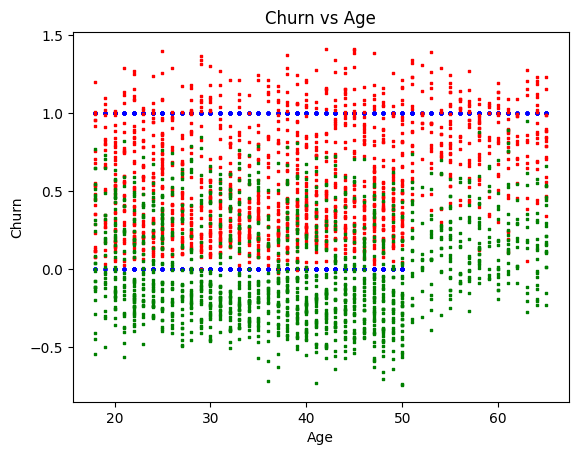

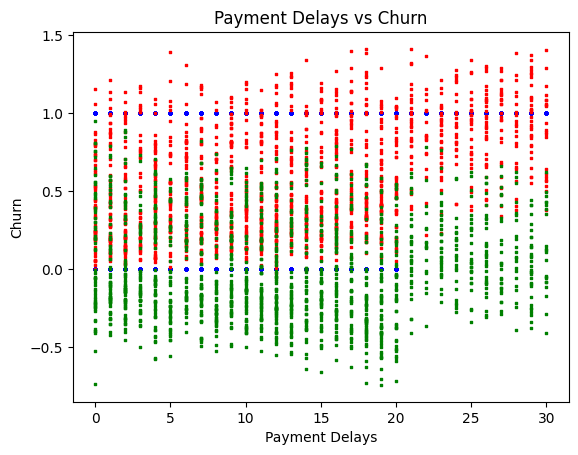

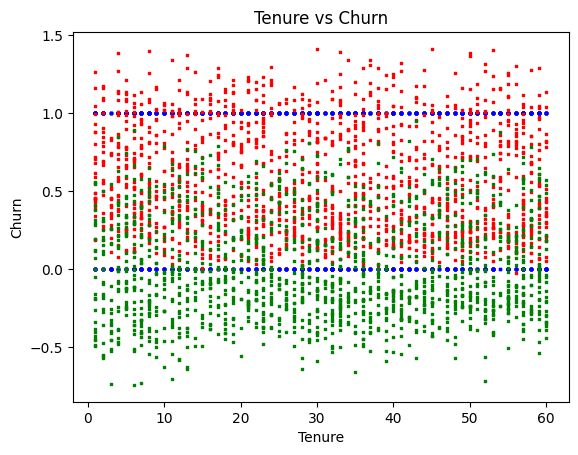

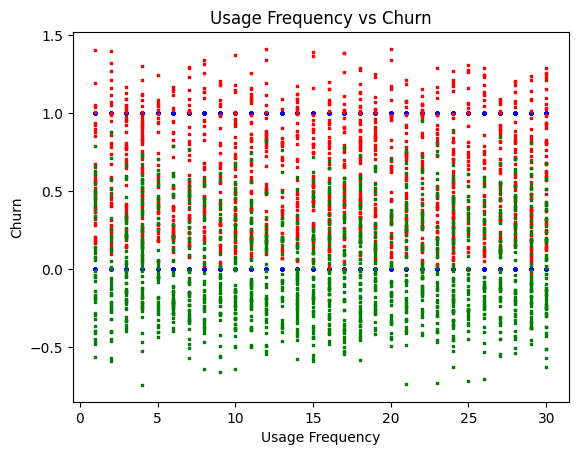

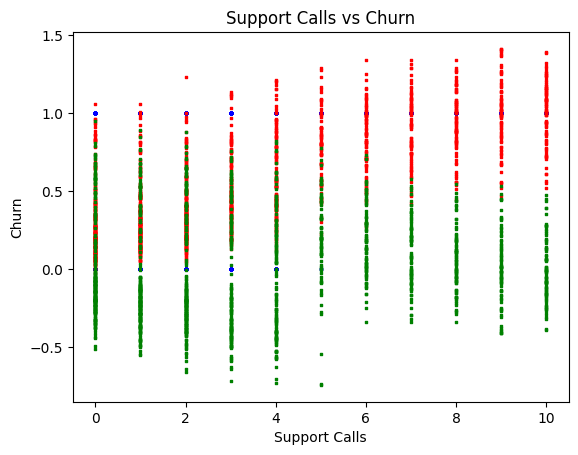

In [ ]:
#This is the main code function block. We consider the efficiency of the model based on the time here


#Choosing activation function: sigmoid or RelU
activ_func=sigmoid
activ_func_deriv=sigmoid_derivative

#Obtaining the first set of graidents


step_size = 0.05
avg_iterations=0
avg_accuracy_train=0
avg_accuracy_test=0
avg_Loss=0
avg_elapsed_time=0
for i in range(10):
 start_time = time.time()
 W1 = np.random.normal(loc=0, scale=1 / np.sqrt(n), size=(p, n))
 b1 = np.random.normal(loc=0, scale=1 / np.sqrt(n), size=p)
 W2 = np.random.normal(loc=0, scale=1 / np.sqrt(p), size=p)
 b2 = np.random.normal(loc=0, scale=1 / np.sqrt(p))

 feature_matrix, y_pred =  find_f_x (x, W1, W2, b1, b2, activ_func)
 dL_dW1, dL_db1, dL_dW2, dL_db2 = obtain_gradients(x,y,y_pred,feature_matrix,activ_func_deriv,W1,b1,W2,b2)
 Loss= obtain_loss(y,y_pred)

 Loss_old=0
 iteration=0
 while(np.abs(Loss-Loss_old)>1e-4):
  Loss_old=Loss #We stop iterating when the Loss stops updating
  #Updating based on gradient descent
  W1 = W1 - step_size*dL_dW1
  W2 = W2 - step_size*dL_dW2
  b1 = b1 - step_size*dL_db1
  b2 = b2 - step_size*dL_db2

  #recalculating all the parameters
  feature_matrix, y_pred =  find_f_x (x, W1, W2, b1, b2, activ_func)
  dL_dW1, dL_db1, dL_dW2, dL_db2 = obtain_gradients(x,y,y_pred,feature_matrix,activ_func_deriv,W1,b1,W2,b2)
  Loss = obtain_loss(y,y_pred)

  iteration=iteration+1

  if(iteration>500):
    raise ValueError("Iterations have exceeded 500")
    break
 end_time = time.time()
 elapsed_time = end_time - start_time

#For test data
 y_pred_train = find_f_x(x, W1,W2,b1,b2,activ_func)[1]
 y_pred_test = find_f_x(x_test, W1,W2,b1,b2,activ_func)[1]
 accuracy_train = np.mean(np.abs(y_pred_train-y)<0.5)
 accuracy_test = np.mean(np.abs(y_pred_test-y_test)<0.5)
 avg_iterations+=iteration
 avg_accuracy_train+=accuracy_train
 avg_accuracy_test+=accuracy_test
 avg_Loss+=Loss
 avg_elapsed_time+=elapsed_time
 Loss_test=obtain_loss(y_test, y_pred_test)
#This block is for output display



x_age = x_bare_clean["Age"].values
x_gender=x_bare_clean["Gender"].values
x_tenure=x_bare_clean["Tenure"].values
x_usage_frequency=x_bare_clean["Usage Frequency"].values
x_support_calls = x_bare_clean["Support Calls"].values
x_payment_delays= x_bare_clean["Payment Delay"].values
x_subscription_type= x_bare_clean["Subscription Type"].values
x_contract_length = x_bare_clean["Contract Length"].values
x_total_spend = x_bare_clean["Total Spend"].values
x_last_interaction=x_bare_clean["Last Interaction"].values



fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x_age, y, s=2, c='b', marker="s", label='Churn')
ax1.scatter(x_age, y_pred, s=2, c='r', marker="s", label='Churn Predicted')
ax1.scatter(x_age, y-y_pred, s=2, c='g', marker="s", label='Residual')
plt.title("Churn vs Age")
plt.xlabel("Age")
plt.ylabel("Churn")

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.scatter(x_payment_delays, y, s=2, c='b', marker="s", label='Churn')
ax2.scatter(x_payment_delays, y_pred, s=2, c='r', marker="s", label='Churn Predicted')
ax2.scatter(x_payment_delays, y-y_pred, s=2, c='g', marker="s", label='Residual')
plt.title("Payment Delays vs Churn")
plt.xlabel("Payment Delays")
plt.ylabel("Churn")

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.scatter(x_tenure, y, s=2, c='b', marker="s", label='Churn')
ax3.scatter(x_tenure, y_pred, s=2, c='r', marker="s", label='Churn Predicted')
ax3.scatter(x_tenure, y-y_pred, s=2, c='g', marker="s", label='Residual')
plt.title("Tenure vs Churn")
plt.xlabel("Tenure")
plt.ylabel("Churn")



fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
ax4.scatter(x_usage_frequency, y, s=2, c='b', marker="s", label='Churn')
ax4.scatter(x_usage_frequency, y_pred, s=2, c='r', marker="s", label='Churn Predicted')
ax4.scatter(x_usage_frequency, y-y_pred, s=2, c='g', marker="s", label='Residual')
plt.title("Usage Frequency vs Churn")
plt.xlabel("Usage Frequency")
plt.ylabel("Churn")

fig5 = plt.figure()
ax5 = fig5.add_subplot(111)
ax5.scatter(x_support_calls , y, s=2, c='b', marker="s", label='Churn')
ax5.scatter(x_support_calls , y_pred, s=2, c='r', marker="s", label='Churn Predicted')
ax5.scatter(x_support_calls , y-y_pred, s=2, c='g', marker="s", label='Residual')
plt.title("Support Calls vs Churn")
plt.xlabel("Support Calls")
plt.ylabel("Churn")





print("Average No. of iterations", avg_iterations/10)
print("Average Loss",avg_Loss/10)
print("Average Elapsed Time", avg_elapsed_time/10)
print("Testing Loss ", Loss_test)
print("Average Accuracy Train", avg_accuracy_train/10)
print("Average Accuracy Test", avg_accuracy_test/10)



In the first block, we have imported the libraries we would require for this neural network.<br>
numpy : numPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.<br>
pandas : Pandas is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data.
OneHotEncoder : a class within the sklearn.preprocessing module of the scikit-learn library in Python. It is used to convert categorical features into a one-hot numerical representation, which is suitable for use with most machine learning algorithms.<br>
StandardScaler : StandardScaler in Python, specifically from the sklearn.preprocessing module, is a widely used technique for standardizing features by removing the mean and scaling to unit variance. This process is also known as Z-score normalization.<br>
time : The time library in Python is a built-in module within the Python Standard Library that provides various functions for handling time-related operations.<br>

We define a Python function called find_f_x. This function calculates the output of a single-hidden-layer neural network.<br>
Inputs :
x: The input data (a NumPy array). Each row represents a data point, and each column represents a feature.<br>
W1: The weights for the hidden layer (a NumPy array).<br>
W2: The weights for the output layer (a NumPy array).<br>
b1: The biases for the hidden layer (a NumPy array).<br>
b2: The bias for the output layer (a single value).<br>
activ_func: The activation function to be used in the hidden layer.
The activation function is vectorised and the feature matrix is calculated which is the core calculation for the hidden layer.<br>
x @ W1.T : Performs matrix multiplication of the input data x with the transpose of the hidden layer weights W1.T. This calculates the weighted sum of inputs for each neuron in the hidden layer.<br>
np.outer(unit_m, b1.T) : Adds the bias to the weighted sums.<br>
y_predicted = feature_matrix @ W2 + b2: This calculates the output of the neural network.

In essence, this function takes the input data, weights, biases, and an activation function, and computes the forward pass of a simple neural network to produce predictions.

 We define two functions: obtain_loss and obtain_gradients. These are essential for training the neural network using gradient descent.

obtain_loss(y, y_pred) : This function calculates the Mean Squared Error (MSE) loss between the true output y and the predicted output y_pred.
This function returns the maen squared error loss.

obtain_gradients(x, y, y_pred, feature_matrix, activ_func_deriv, W1, b1, W2, b2): This function calculates the gradients of the loss function with respect to the weights (W1, W2) and biases (b1, b2) of the neural network. These gradients are used to update the weights and biases during the training process (gradient descent).<br>
This function calculates the gradients of the loss function with respect to the neural network’s weights (W1, W2) and biases (b1, b2), which are essential for updating parameters during training via gradient descent.<br>
 It uses the inputs, true outputs, predicted outputs, hidden layer output, activation function derivative, and current parameters. Gradients for the output layer (dL_dW2, dL_db2) are computed from the prediction error, while gradients for the hidden layer (dL_dW1, dL_db1) are obtained through backpropagation using the chain rule to trace how the loss changes with each weight and bias.<br>
  The function returns all four gradients to be used in the optimization step.



We have a bloc for the sigmoid activation function and its derivative, which are used in neural networks.<br>
The function def sigmoid(x): takes an input x and returns the value of the sigmoid function at x.<br>
The function def sigmoid_derivative(x): takes an input x and returns the value of the derivative of sigmoid function at x.

We have a bloc for the ReLU(Rectified Linear Unit) activation function and its derivative, which are used in neural networks.<br>
The function def Relu(x): takes an input x and returns the value of the ReLU function at x.<br>
The function def Relu_derivative(x): takes an input x and returns the value of the derivative of ReLU function at x.

This preprocessing code block performs several data preprocessing steps on the training data (df) and initializes the weights and biases for the neural network.<br>
The several data preprocessing steps performed in this code block are:
1. Dropping CustomerID - The "CustomerID" column is dropped as it's likely a unique identifier and not useful for training the model.
2. Separating Features and Target : The "Churn" column (the target variable) is separated from the features and stored in x_bare.
3. Identifying Categorical Columns : categorical_cols = ["Gender", "Subscription Type", "Contract Length"]: This list defines the names of the categorical columns that need to be one-hot encoded.
4. Handling missing values : X_numeric = x_bare.drop(columns=categorical_cols)<br>rows_without_nan = X_numeric.dropna().index<br> df_clean = df.loc[rows_without_nan].reset_index(drop=True)
These lines remove rows with missing values in numeric columns from the entire training data.
5. Separating Target and Features in Cleaned data : y = df_clean["Churn"].values: Extracts the "Churn" column from the cleaned DataFrame as a NumPy array y.<br>
x_bare_clean = df_clean.drop(columns=["Churn"]): Creates a DataFrame with the cleaned features.
6. One-Hot encoding Categorical Features and combining numeric and encoded features.
7. Standardizing Features : scaler = StandardScaler(): Initializes a StandardScaler.<br>
x = scaler.fit_transform(X_all): Applies standardization to the entire feature matrix X_all. Standardization scales features to have a mean of 0 and a standard deviation of 1.
<br><br>
This code block also initializes the weights and biases of the neural network.
m, n = x.shape: Gets the number of samples (m) and features (n) from the standardized feature matrix x.<br>
p = 5: Sets the number of neurons in the hidden layer to 5.<br>
The following lines initialize the weights (W1, W2) and biases (b1, b2) for the neural network using random values drawn from a normal distribution. The scaling factor (1 / np.sqrt(n) and 1 / np.sqrt(p)) is a common practice to help with the initialization of weights in neural networks.

This code block is the main part of the neural network training process. It implements gradient descent to learn the optimal weights and biases for the model based on the training data.
1. Timing the Training : start_time = time.time(): Records the start time to measure how long the training takes.
2. Choosing Activation Function : We can choose either the sigmoid function or the ReLU function as the activation function to be used in the neural network.
3. Initial Gradient Calculation : feature_matrix, y_pred = find_f_x (x, W1, W2, b1, b2, activ_func): Performs a forward pass through the network with the initial random weights and biases to get the initial predicted outputs (y_pred) and the hidden layer output (feature_matrix).<br>
dL_dW1, dL_db1, dL_dW2, dL_db2 = obtain_gradients(x,y,y_pred,feature_matrix,activ_func_deriv,W1,b1,W2,b2): Calculates the gradients of the loss function with respect to each weight and bias using the obtain_gradients function.<br>
Loss= obtain_loss(y,y_pred): Calculates the initial loss (Mean Squared Error) using the obtain_loss function.
4. Gradient Descent Loop : Loss_old=0: Initializes the previous loss.<br>
iteration=0: Sets iteration counter.<br>
step_size=0.05: Learning rate for gradient descent.<br>
while(np.abs(Loss-Loss_old)>1e-4):: Main training loop; stops when loss improvement < 0.0001.<br>
Loss_old=Loss: Stores current loss.

Updating parameters:
W1, W2, b1, b2 are updated by subtracting step_size × respective gradients.

Recalculating:
feature_matrix, y_pred = find_f_x(...): Forward pass with updated parameters.
dL_dW1, dL_db1, dL_dW2, dL_db2 = obtain_gradients(...): Compute new gradients.
Loss = obtain_loss(...): Compute new loss.

iteration += 1: Increment iteration counter.
print(iteration): Show progress.
if iteration > 500: Stop and raise error to prevent infinite loops.

end_time = time.time(); elapsed_time = end_time - start_time: Record total training time.
5. Evaluating on Test data : y_pred_train = find_f_x(...): Calculates the predictions on the training data using the final learned parameter.<br>
y_pred_test = find_f_x(...):  Calculates the predictions on the test data using the final learned parameters.<br>
print(...):  Prints the shapes of the true training outputs, predicted training outputs, and predicted test outputs.<br>
accuracy_train = np.mean(np.abs(y_pred_train-y)<0.5): Calculates the training accuracy. For a binary classification problem with outputs close to 0 or 1, this considers a prediction "correct" if the absolute difference between the prediction and the true value is less than 0.5.<br>
accuracy_test = np.mean(np.abs(y_pred_test-y_test)<0.5): Calculates the testing accuracy using the same logic.


This is the implementation of the neural network with the sigmoid function being used as the activation function.

Conclusions :
We run the neural network ten times for both, the sigmoid and ReLU function.
On comparing the different performance metrics of the two models we come to several conclusions:<br>
1. Number of iterations : When we use the sigmoid function, the number of iterations required to obtain the ideal weights and biases of the neural network is very less as compared to the ReLU function.
2. Loss : The value of the loss function is similar in both the models.
3. Elapsed Time : The time taken for training is vastly different for both the models. By using the sigmoid function, the number of iterations are very less and hence the time taken for training is low as comapared to the ReLU function.
4. Accuracy of training : the accuracy of both the models in the training process is almost equal an

# References
wikipedia.org
geeksforgeeks.org
mathworld.wolfram.com
A bit of help for explanations from chatgpt.com
